In [ ]:
import pygmt
import pandas as pd
import h5py
import numpy as np

In [ ]:
with h5py.File('OUTPUT_FILES/model_iter.h5', 'r') as f:
    initial_vs = f['vs_000'][:].T
    x = f['x'][:]
    y = f['y'][:]
    z = f['z'][:]
with h5py.File('OUTPUT_FILES/final_model.h5', 'r') as f:
    final_vs = f['vs'][:].T
dv = (final_vs - initial_vs) / initial_vs * 100

<KeysViewHDF5 ['vs', 'x', 'y', 'z']>


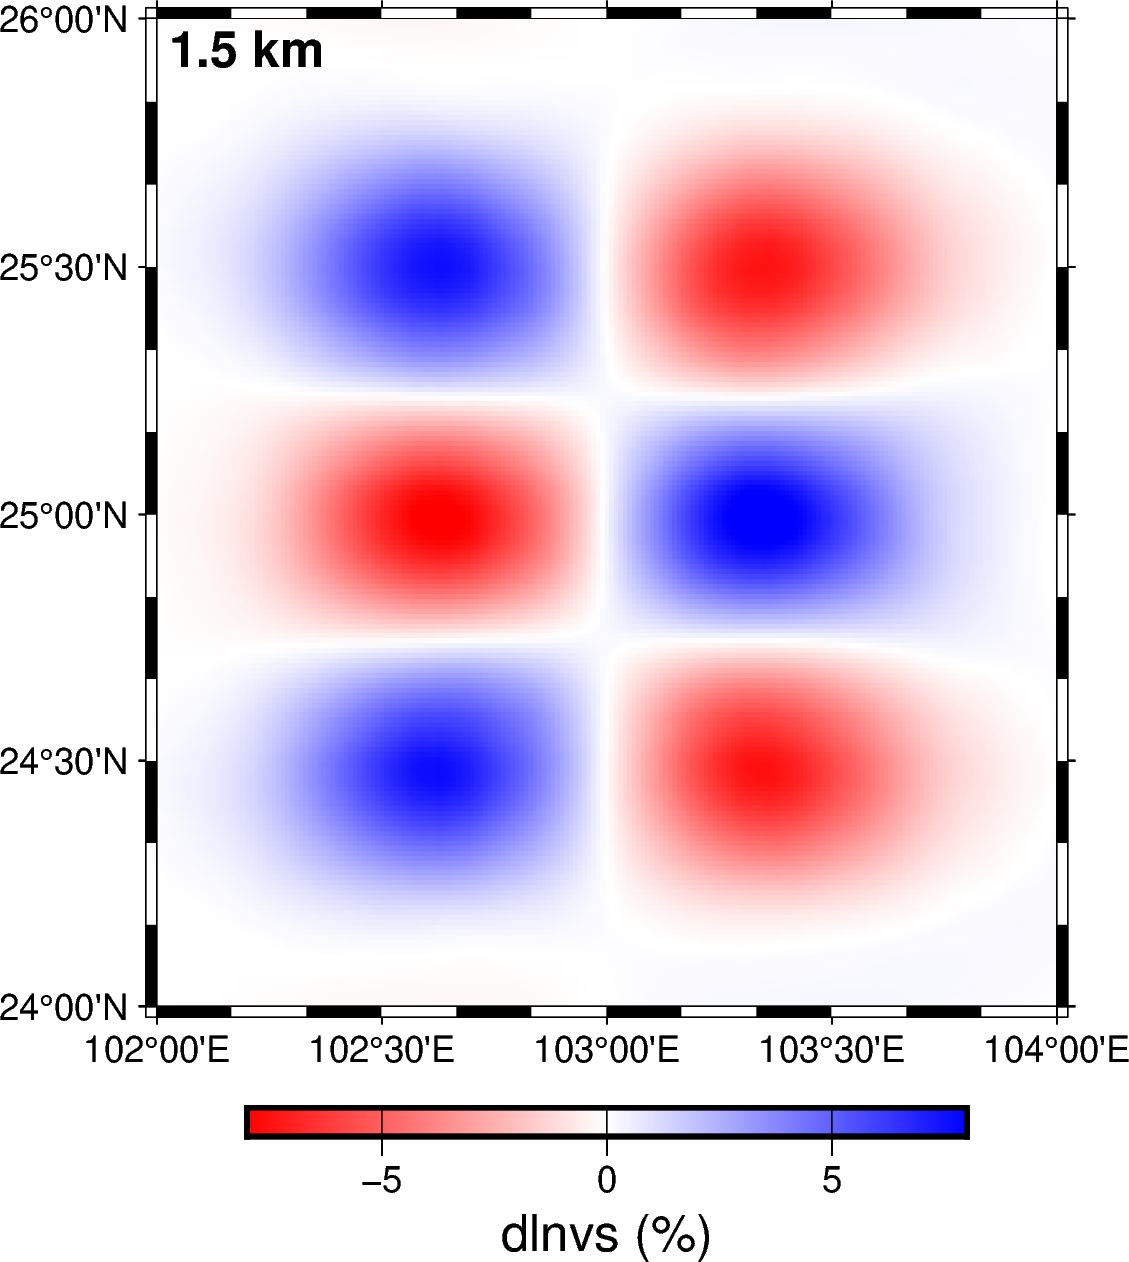

In [8]:
idep = 5
region = [102, 104, 24,26]
xx, yy = np.meshgrid(x, y, indexing='ij')
grid = pygmt.surface(x=xx.ravel(), y=yy.ravel(), z=dv[:, :, idep].ravel(), region=region, spacing='0.01/0.01')
fig = pygmt.Figure()
pygmt.makecpt(cmap='polar', series=[-8, 8, 0.1], background=True, continuous=True, reverse=True)
fig.grdimage(
    grid,
    cmap=True,
    region=region,
    projection='M3i',
    frame='af'
)
fig.text(text=f"{z[idep]} km", position='TL', font='12p,Helvetica-Bold', offset='0.1/-0.1')
fig.colorbar(frame='xag+l"dlnvs (%)"')
fig.show()